In [64]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sympy import pprint

In [65]:
#INITIALIZE VARIABLES

# d1 = 183.3 #joint 1 height [mm]
# d2 = 737.31 #joint 2 radius [mm]
# d3 = 387.8 #joint 3 radius [mm]
# d4 = 95.5 #joint 4 radius [mm]
# d5 = 115.5 #joint 5 radius [mm]
# d6 = 76.8+45 #end effector offset
# q = sp.pi/2 #standard 90 degree angle for ease of coding
l1 = sp.Symbol('l_1')
l2 = sp.Symbol('l_2')
l3 = sp.Symbol('l_3')
l4 = sp.Symbol('l_4')
theta1 = sp.Symbol('theta_1')
theta2 = sp.Symbol('theta_2')
theta3 = sp.Symbol('theta_3')



In [66]:
#INITIALIZE SYMBOLS
thetai = sp.Symbol('theta_i')
t = sp.Symbol('t')
ai = sp.Symbol('a_i')
di = sp.Symbol('d_i')
alphai = sp.Symbol('alpha_i')
pi = sp.Symbol('pi')

In [67]:
#CREATE DH TABLE ROWS


dh_theta = [theta1,(3.1415/2)+theta2, theta3-(3.1415/3), 0]
dh_a = [0,0,0,0]
dh_d = [l1,l2,0,l3+l4]
dh_alpha = [-3.1415/6,3.1415/2,-3.1415/2,0]


In [68]:
#CREATE DH TABLE

dh_table = {
    "": ["0 to 1", "1 to 2", "2 to 3", "3to 4"],
    di: [dh_d[0],dh_d[1],dh_d[2],dh_d[3]],
    thetai: [dh_theta[0],dh_theta[1],dh_theta[2],dh_theta[3]],
    alphai: [dh_alpha[0],dh_alpha[1],dh_alpha[2],dh_alpha[3]],
    ai: [dh_a[0],dh_a[1],dh_a[2],dh_a[3]]

}

df = pd.DataFrame(dh_table)
df

,,d_i,theta_i,alpha_i,a_i
0,0 to 1,l_1,theta_1,-0.523583,0
1,1 to 2,l_2,theta_2 + 1.57075,1.570750,0
2,2 to 3,0,theta_3 - 1.04716666666667,-1.570750,0
3,3to 4,l_3 + l_4,0,0.000000,0


In [69]:
#CREATE TRANSFORMATION MATRICES

#Array of all transformation matrices
A_array = [sp.zeros(4,4)]*4
for i in range(0,4):
    A_array[i] = sp.Matrix([
        [sp.cos(dh_theta[i]),-sp.sin(dh_theta[i])*sp.cos(dh_alpha[i]),sp.sin(dh_theta[i])*sp.sin(dh_alpha[i]),dh_a[i]*sp.cos(dh_theta[i])],
        [sp.sin(dh_theta[i]),sp.cos(dh_theta[i])*sp.cos(dh_alpha[i]),-sp.cos(dh_theta[i])*sp.sin(dh_alpha[i]),dh_a[i]*sp.sin(dh_theta[i])],
        [0,sp.sin(dh_alpha[i]),sp.cos(dh_alpha[i]),dh_d[i]],
        [0,0,0,1]
    ])
    


#Final transformation matrix A1*A2*A3*A4*A5*A6
A_final = A_array[0]
for i in range(1,4):
    A_final = A_final*A_array[i]


#Array of transformation matrix products [A1, A1*A2, A1*A2*A3,] etc
A_products = [A_array[0]]*4
for i in range(1,4):
    A_products[i] = A_products[i-1]*A_array[i]



In [70]:
#MATRIX SUBSTITUTION FUNCTIONS

#Substitutes theta values into given matrix and returns matrix 
def subs_function(matrix,sub_values):
    result = matrix.subs([
        (theta1,sub_values[0]),
        (theta2,sub_values[1]),
        (theta3,sub_values[2]),
        (l4,sub_values[3])   
    ])
    return result

#Returns position vector of given transformation matrix and theta values
def subs_position_vector(matrix,sub_values):
    msubs = matrix.subs([
        (theta1,sub_values[0]),
        (theta2,sub_values[1]),
        (theta3,sub_values[2]),
        (l4,sub_values[3])   
    ])
    result = sp.Matrix([
        [msubs[0,3]],
        [msubs[1,3]],
        [msubs[2,3]],
        [0],
        [0],
        [0]
    ])
    return result






In [ ]:


# #VALIDATE TRANSFORMATION MATRIX

# #5 different sets of theta values for validation
for i in range(0,4):
    A_products[i] = A_products[i].subs([(l1,1.5),(l2,1),(l3,0.5)])
    
A_final = A_final.subs([(l1,1.5),(l2,1),(l3,0.5)])

q = 3.1415/2
val_matrix = sp.Matrix([
    [0, q, 0, 0, 0],
    [0, 0, q, 0, 0],
    [0, 0, 0, q, 0],
    [0, 0, 0, 0, 2]

])

#Array of resulting matrices
A_vals = [sp.zeros(4,4)]*5
for i in range(0,5):
    A_vals[i] = subs_function(A_final,val_matrix[:,i])


pos_vals = ["start position","first joint rotated 90 degrees","second joint rotated 90 degrees","third joint rotated 90 degrees","extended 2"]
print("Transformation matrix validation")
for i in range(0,5):
    print("---------------")
    print(pos_vals[i])
    print(
        "x = ",((A_vals[i])[0,3]).round(2),#get x value from matrix i in A_vals array
        "y = ",((A_vals[i])[1,3]).round(2),#get y value from matrix i in A_vals array
        "z = ",((A_vals[i])[2,3]).round(2))#get z value from matrix i in A_vals array




Transformation matrix validation
---------------
start position
x =  0.0 y =  1.00000000000000 z =  2.37
---------------
first joint rotated 90 degrees
x =  -1.00000000000000 y =  0.0 z =  2.37
---------------
second joint rotated 90 degrees
x =  -0.43 y =  0.63 z =  2.58
---------------
third joint rotated 90 degrees
x =  0.0 y =  0.50 z =  2.87
---------------
extended 2
x =  0.0 y =  3.00000000000000 z =  2.37


In [74]:
#a point P is given in end effector coordinates as -1,2,3, determine the coordiantes of P in the base frame
point = sp.Matrix([-1,2,3,1])
new_positions = [3.1415/2,-3.1415/6,3.1415/3,2]
subs_function(A_final,new_positions)*point

Matrix([
[-3.36610261138106],
[-2.23189073041171],
[ 7.06219533791792],
[                1]])

In [ ]:
#JACOBIAN


In [84]:
#CREATE JACOBIAN


# thetas_vector = sp.Matrix([thetas[0],thetas[1],thetas[2],thetas[3],thetas[4],thetas[5]])

# P = sp.Matrix([A_final[0,3],A_final[1,3],A_final[2,3]])

# Jv = P.jacobian(thetas_vector) #create 3x6 Jv matrix

Z = sp.zeros(3,5) #initialize 3x6 Jw matrix of zeros
Z[:,0] = sp.Matrix([0,0,1])

#replace values in Z with correct values from matrices in A_products array
for c in range(1,5):
    for r in range(0,3):
        Z[r,c] = (A_products[c-1])[r,2]


O = sp.zeros(3,5)
O[:,0] = sp.Matrix([0,0,0])
O[:,4] = sp.Matrix([0,0,0])
for c in range(1,4):
    for r in range(0,3):
        O[r,c] = (A_products[c-1])[r,3]


Jv = sp.zeros(3,4) #initialize 6x6 matrix of zeros
for c in range(0,4):
    Jv[:,c] = Z[:,c].cross(O[:,-1]-O[:,c])

#replace values with values from Jv and Jw
J= sp.zeros(6,4)
for c in range(0,4):
    for r in range(0,3):
        J[r,c] = Jv[r,c]
        J[r+3,c] = Z[r,c]


J



Matrix([
[0, -0.749979939819949*cos(theta_1),                                                                                                                       0.499986626546633*(0.499986626010104*cos(theta_2 + 1.57075) + 4.01205389324914e-5)*cos(theta_1) - 2.36603312227471*sin(theta_1)*sin(theta_2 + 1.57075) + 2.04906305829619*cos(theta_1)*cos(theta_2 + 1.57075) - 5.48038997522111e-5*cos(theta_1),                                                                                                                                                                                                                                                                                     2.36603312227471*(sin(theta_1)*cos(theta_2 + 1.57075) + 0.866033124813663*sin(theta_2 + 1.57075)*cos(theta_1))*sin(theta_3 - 1.04716666666667) - 2.36603312227471*(-4.63267948799578e-5*sin(theta_1)*sin(theta_2 + 1.57075) + 4.01205389324914e-5*cos(theta_1)*cos(theta_2 + 1.57075) + 0.499986626010104*cos(theta_1))*cos(th

In [10]:
#PATH INPUTS

#initialize inputs
increment = 1 #time increment [s]
duration = 200 #total time [s]
arraysize = int(duration/increment) 
time = np.arange(0, duration, increment) #time array

theta_initial = sp.Matrix([0,3.14/4,3.14/4,0,3.14/4,0]) #Initial theta values (chosen at random)
ee_A_final = subs_position_vector(A_final,theta_initial) #Initial x,y,z position of end effector based on initial theta values

#initial end effector posiitons with respect to base frame [mm]
ee_x_initial = ee_A_final[0] 
ee_y_initial = ee_A_final[1]
ee_z_initial = ee_A_final[2]


#calculate distances traveled during paths
path1_distance = 50*sp.pi
path2_distance = 50
path3_distance = 100
path4_distance = 50
total_distance = path1_distance+path2_distance+path3_distance+path4_distance

#calculate time taken for each path
path1_time = (path1_distance/total_distance)*duration
path2_time = (path2_distance/total_distance)*duration
path3_time = (path3_distance/total_distance)*duration
path4_time = (path4_distance/total_distance)*duration

#calculate start time of each path
path1_start = 0
path2_start = path1_time.round(1)
path3_start = (path2_start+path2_time).round(1)
path4_start = (path3_start+path3_time).round(1)




In [11]:

#VELOCITY PROFILES

#equation for path 1 position with respect to time
path1_x = -(50*sp.cos((sp.pi/path1_time)*t))
path1_y = 0
path1_z = (50*sp.sin((sp.pi/path1_time)*t))

#equation for path 1 velocities with repect to time
path1_xdot = sp.diff(path1_x,t)
path1_ydot = 0
path1_zdot = sp.diff(path1_z,t)

#calculate path 2 velocities
path2_xdot = 0
path2_ydot = 0
path2_zdot = -50/path2_time

#calculate path 3 velocities
path3_xdot = -100/path3_time
path3_ydot = 0
path3_zdot = 0

#calculate path 4 velocities
path4_xdot = 0
path4_ydot = 0
path4_zdot = 50/path4_time

#create xdot master matrix for all paths 
XDOT = sp.Matrix([
    [path1_xdot, path2_xdot, path3_xdot, path4_xdot],
    [path1_ydot, path2_ydot, path3_ydot, path4_ydot],
    [path1_zdot, path2_zdot, path3_zdot, path4_zdot],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]])



In [12]:

#initialize array sizes for each path (for use in for loops)
path1_arraysize = int(path1_time/increment)
path2_arraysize = int(path2_time/increment)
path3_arraysize = int(path3_time/increment)
path4_arraysize = int(path4_time/increment)




In [13]:
#calculate initial inverse jacobian to obtain initial thetadot values


j_initial = (subs_function(J,theta_initial)) #initial  jacobian

if j_initial.det()<0.001:

    jinv_initial = j_initial.pinv()
else:
    jinv_initial = j_initial.inv()

thetadot_initial = jinv_initial*((XDOT[:,0]).subs([(t,0)])) #initial thetadot values















In [14]:
#CALCULATE ANGULAR POSITIONS AND SPEEDS

#Create theta and thetadot arrays and populate with initial values
THETA = sp.zeros(6,arraysize)
THETA[:,0] = theta_initial
THETADOT = sp.zeros(6,arraysize)
THETADOT[:,0] = thetadot_initial

#Fill theta and thetadot arrays
for c in range(1,arraysize):
    t_var = time[c]
    for r in range(0,6):
        THETA[r,c] = (THETA[r,c-1]+((THETADOT[r,c-1])*increment)).round(10)#rounded to speed up program run time
    JSUBS = subs_function(J,THETA[:,c])

    if JSUBS.det()<0.0001:
        jinv = JSUBS.pinv()
    else:
        jinv = JSUBS.inv()
    
    if t_var < path2_start:
        thetadot_temp = jinv*((XDOT[:,0]).subs([(t, t_var)]))
    elif path2_start <= t_var < path3_start:
        thetadot_temp = jinv*XDOT[:,1]
    elif path3_start <= t_var < path4_start:
        thetadot_temp = jinv*XDOT[:,2]
    else:
        thetadot_temp = jinv*XDOT[:,3]

    for r in range(0,6):
        THETADOT[r,c] = thetadot_temp[r]

    

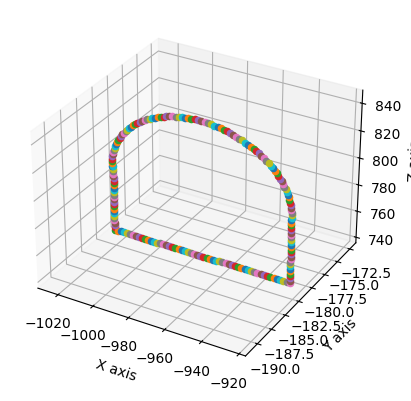

⎡-1024.38056  -1024.37644  -1024.30884  -1024.17784  -1023.98358  -1023.72632  ↪
⎢                                                                              ↪
⎢-181.65989   -181.65989   -181.65989   -181.65989   -181.65989   -181.65989   ↪
⎢                                                                              ↪
⎣ 791.35652    793.1419     794.92613    796.70693    798.48201    800.24912   ↪

↪  -1023.40637  -1023.02412  -1022.58005  -1022.0747  -1021.50871  -1020.88277 ↪
↪                                                                              ↪
↪  -181.65989   -181.65989   -181.65989   -181.65989  -181.65989   -181.65989  ↪
↪                                                                              ↪
↪    802.006     803.75039    805.48008   807.19285    808.88652    810.55891  ↪

↪   -1020.19766  -1019.45423  -1018.65342  -1017.79621  -1016.88369  -1015.916 ↪
↪                                                                              ↪
↪   -181.65989   -181.6598

In [15]:
#PLOTTING END EFFECTOR POSITION
end_effector_xyz = sp.zeros(3,arraysize)#initialize matrix of xyz positions 

#sub theta array values into final transformation matrix to get end effector xyz values
for c in range(0,arraysize):
    Asubs = subs_function(A_final,THETA[:,c])
    end_effector_xyz[0,c] = (Asubs[0,3]).round(5)
    end_effector_xyz[1,c] = (Asubs[1,3]).round(5)
    end_effector_xyz[2,c] = (Asubs[2,3]).round(5)



#PLOT END EFFECTOR PATH
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,arraysize):
    
    ax.scatter([end_effector_xyz[0,i]], [end_effector_xyz[1,i]], [end_effector_xyz[2,i]])


# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


# Show plot
plt.show()

pprint(end_effector_xyz)


In [16]:
#Rough estimate of weight of each link
m = 11 #robot mass is 11 kg

#lengths of the 8 cylinders
c1 = 173.3
c2 = 172.3
c3 = 737.31
c4 = 172.3
c5 = 387.8
c6 = 95.5
c7 = 115.5
c8 = 76.8
cpen = 45
mpl = m/(c1+c2+c3+c4+c5+c6+c7+c8) #mass per unit length of cylinder

#weights of each link
link1mass = mpl*c1
link2mass = mpl*(c2+c3)
link3mass = mpl*(c4+c5)
link4mass = mpl*c6
link5mass = mpl*c7
link6mass = mpl*c8


cm1z = (96.65)*0.001
cm2z = (183.3+(305.43*sp.cos(thetas[1])))*0.001
cm3z = (183.3+737.31*sp.cos(thetas[1])+138.67*sp.cos(thetas[1]+thetas[2]))*0.001
cm4z = (183.3+737.31*sp.cos(thetas[1])+387.8*sp.cos(thetas[1]+thetas[2]))*0.001
cm5z = (cm4z+57.75*sp.cos(thetas[1]+thetas[2]+thetas[3]))*0.001
cm6z = (cm4z+(115.5*sp.cos(thetas[1]+thetas[2]+thetas[3]))+38.4*sp.sin(thetas[4]))*0.001










In [17]:

#Potential energy equation as a function of thetas 1-6
PE = 9.81*(
    (link1mass*cm1z)+
    (link2mass*cm2z)+
    (link3mass*cm3z)+
    (link4mass*cm4z)+
    (link5mass*cm5z)+
    (link6mass*cm6z))


#g vector is partial derivative of PE with respect to thetas 1-6
g = sp.zeros(6,1)
for i in range(0,6):
    g[i] = sp.diff(PE,thetas[i])

#PRINT PARAMETRIC GRAVITY MATRIX
pprint(g)














⎡                                               0                              ↪
⎢                                                                              ↪
⎢-42.5503672184901⋅sin(θ₂) - 6.41479604561578⋅sin(θ₂ + θ₃) - 0.868536030344778 ↪
⎢                                                                              ↪
⎢             -6.41479604561578⋅sin(θ₂ + θ₃) - 0.868536030344778⋅sin(θ₂ + θ₃ + ↪
⎢                                                                              ↪
⎢                             -0.868536030344778⋅sin(θ₂ + θ₃ + θ₄)             ↪
⎢                                                                              ↪
⎢                                    0.1648217790461⋅cos(θ₅)                   ↪
⎢                                                                              ↪
⎣                                               0                              ↪

↪                   ⎤
↪                   ⎥
↪ ⋅sin(θ₂ + θ₃ + θ₄)⎥
↪                   ⎥
↪  θ₄)              

In [18]:
#CALCULATE REQUIRED TORQUE (NOT INCLUDING FRICTION FROM PEN)
F = sp.Matrix([0,-5,0,0,0,0])# force vector only considers normal force on pen
JT = J.transpose()#transpose of original jacobian from original DH table
torque = g - ((JT*0.001)*F)#torque equation, 0.001 is to convert original jacobian to meters
torque_array = sp.zeros(6,arraysize)
for c in range(0,arraysize):
    torque_array[:,c] = ((subs_function(torque,THETA[:,c]))).applyfunc(lambda x: round(x,5))

pprint(torque_array)

⎡-5.1219   -5.12188   -5.12154   -5.12089  -5.11992   -5.11863   -5.11703   -5 ↪
⎢                                                                              ↪
⎢-37.359   -37.35899  -37.35563  -37.3489  -37.33876  -37.32521  -37.30821  -3 ↪
⎢                                                                              ↪
⎢-7.28333  -7.28324   -7.28302   -7.28269  -7.28226   -7.28174   -7.28115    - ↪
⎢                                                                              ↪
⎢-0.86854  -0.86854   -0.86854   -0.86854  -0.86854   -0.86854   -0.86854   -0 ↪
⎢                                                                              ↪
⎢0.54705    0.54705    0.54705   0.54705    0.54705    0.54705    0.54705    0 ↪
⎢                                                                              ↪
⎣   0          0          0         0          0          0          0         ↪

↪ .11512    -5.1129   -5.11037   -5.10754   -5.10441   -5.10099   -5.09727   - ↪
↪                          

In [19]:
#CALCULATE REQUIRED TORQUE, INCLUDING FRICTION FROM THE PEN
#Find direction of travel for each path by finding unit vectors of xdot,ydot,zdot
PATH_UNIT_VECTORS = sp.zeros(3,4)
for c in range(0,4):
    for r in range(0,3):
        PATH_UNIT_VECTORS[r,c] = XDOT[r,c]/(XDOT[:3,c].norm())

friction_force = 0.3*5 #force from coefficient of friction 0.3 and normal force 5 N

#4 separate force vectors, one for each path, dependent on direction of travel
F_with_friction = sp.zeros(6,4)
for c in range(0,4):
    F_with_friction[0,c] = -friction_force*PATH_UNIT_VECTORS[0,c]
    F_with_friction[1,c] = -5
    F_with_friction[2,c] = -friction_force*PATH_UNIT_VECTORS[2,c]
    F_with_friction[3,c] = 0
    F_with_friction[4,c] = 0
    F_with_friction[5,c] = 0

#Torque equation for each joint for each path
torque_with_friction = sp.zeros(6,4)
for c in range(0,4):
    torque_with_friction[:,c] = g-((JT*0.001)*F_with_friction[:,c])

#Torque array to compensate for link weights, normal force, and friction force
torque_with_friction_array = sp.zeros(6,arraysize)
for c in range(0,arraysize):
    t_var = time[c]
    if t_var < path2_start:
        torque_with_friction_array[:,c] = ((subs_function((torque_with_friction[:,0]).subs([(t,t_var)]),THETA[:,c]))).applyfunc(lambda x: round(x,5))
    elif path2_start <= t_var < path3_start:
        torque_with_friction_array[:,c] = ((subs_function(torque_with_friction[:,1],THETA[:,c]))).applyfunc(lambda x: round(x,2))
    elif path3_start <= t_var < path4_start:
        torque_with_friction_array[:,c] = ((subs_function(torque_with_friction[:,2],THETA[:,c]))).applyfunc(lambda x: round(x,2))
    else:
        torque_with_friction_array[:,c] = ((subs_function(torque_with_friction[:,3],THETA[:,c]))).applyfunc(lambda x: round(x,2))

pprint(torque_with_friction_array)



⎡ -5.1219   -5.11215    -5.1021   -5.09175   -5.08113   -5.07024    -5.0591    ↪
⎢                                                                              ↪
⎢-38.89557  -38.92723  -38.95364  -38.97474  -38.99045  -39.00074  -39.00554   ↪
⎢                                                                              ↪
⎢-8.03818   -8.04232   -8.04555   -8.04785   -8.04924    -8.0497   -8.04926    ↪
⎢                                                                              ↪
⎢-1.04168   -1.04619   -1.05047   -1.05451   -1.05832   -1.06189   -1.06521    ↪
⎢                                                                              ↪
⎢ 0.67629    0.67621    0.67597    0.67556    0.67499    0.67425    0.67336    ↪
⎢                                                                              ↪
⎣    0          0          0          0          0          0          0       ↪

↪ -5.04772   -5.03611    -5.0243    -5.0123   -5.00011   -4.98777   -4.97527   ↪
↪                          

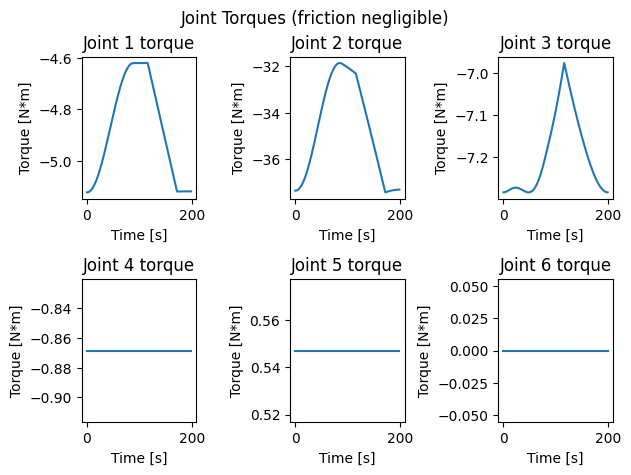

In [20]:
figure, axis = plt.subplots(2,3)

axis[0,0].plot(time, (torque_array[0,:]).transpose())
axis[0,0].set_title("Joint 1 torque")
axis[0,0].set_xlabel("Time [s]")
axis[0,0].set_ylabel("Torque [N*m]")

axis[0,1].plot(time, (torque_array[1,:]).transpose())
axis[0,1].set_title("Joint 2 torque")
axis[0,1].set_xlabel("Time [s]")
axis[0,1].set_ylabel("Torque [N*m]")

axis[0,2].plot(time, (torque_array[2,:]).transpose())
axis[0,2].set_title("Joint 3 torque")
axis[0,2].set_xlabel("Time [s]")
axis[0,2].set_ylabel("Torque [N*m]")

axis[1,0].plot(time, (torque_array[3,:]).transpose())
axis[1,0].set_title("Joint 4 torque")
axis[1,0].set_xlabel("Time [s]")
axis[1,0].set_ylabel("Torque [N*m]")


axis[1,1].plot(time, (torque_array[4,:]).transpose())
axis[1,1].set_title("Joint 5 torque")
axis[1,1].set_xlabel("Time [s]")
axis[1,1].set_ylabel("Torque [N*m]")

axis[1,2].plot(time, (torque_array[5,:]).transpose())
axis[1,2].set_title("Joint 6 torque")
axis[1,2].set_xlabel("Time [s]")
axis[1,2].set_ylabel("Torque [N*m]")


plt.tight_layout(rect=[0,0,1,0.96])
figure.suptitle("Joint Torques (friction negligible)")
plt.show()

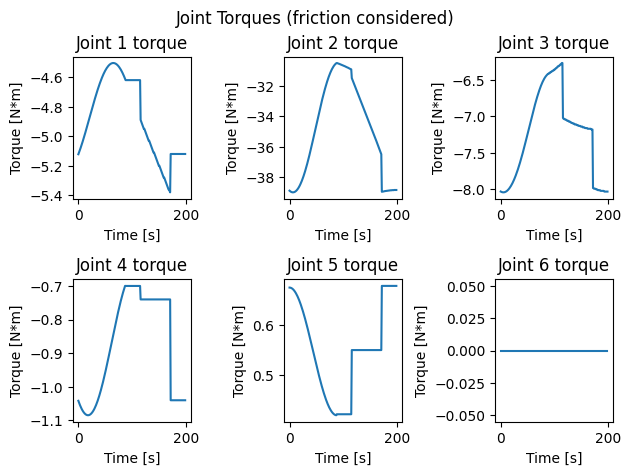

In [21]:
figure, axis = plt.subplots(2,3)

axis[0,0].plot(time, (torque_with_friction_array[0,:]).transpose())
axis[0,0].set_title("Joint 1 torque")
axis[0,0].set_xlabel("Time [s]")
axis[0,0].set_ylabel("Torque [N*m]")

axis[0,1].plot(time, (torque_with_friction_array[1,:]).transpose())
axis[0,1].set_title("Joint 2 torque")
axis[0,1].set_xlabel("Time [s]")
axis[0,1].set_ylabel("Torque [N*m]")

axis[0,2].plot(time, (torque_with_friction_array[2,:]).transpose())
axis[0,2].set_title("Joint 3 torque")
axis[0,2].set_xlabel("Time [s]")
axis[0,2].set_ylabel("Torque [N*m]")

axis[1,0].plot(time, (torque_with_friction_array[3,:]).transpose())
axis[1,0].set_title("Joint 4 torque")
axis[1,0].set_xlabel("Time [s]")
axis[1,0].set_ylabel("Torque [N*m]")


axis[1,1].plot(time, (torque_with_friction_array[4,:]).transpose())
axis[1,1].set_title("Joint 5 torque")
axis[1,1].set_xlabel("Time [s]")
axis[1,1].set_ylabel("Torque [N*m]")

axis[1,2].plot(time, (torque_with_friction_array[5,:]).transpose())
axis[1,2].set_title("Joint 6 torque")
axis[1,2].set_xlabel("Time [s]")
axis[1,2].set_ylabel("Torque [N*m]")


plt.tight_layout(rect=[0,0,1,0.96])
figure.suptitle("Joint Torques (friction considered)")
plt.show()